In [1]:
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt

np.set_printoptions(suppress=True)

In [2]:
class SGDClassifier:
    
    def __init__(self, eta0 = 0.01, fit_intercept = True):
        
        self.eta0 = eta0
        self.fit_intercept = fit_intercept
        
        self.classes_ = np.array([])
        self.n_classes_ = 0
        
        self.intercept_ = np.array([])
        self.coef_ = np.array([])
    
    def _sigmoid(self, z):
        
        result = 1 / (1 + np.exp(-z))
        
        return result
    
    def partial_fit(self, X, y, classes):
        
        if (not self.classes_.any()):
            self.classes_ = classes
            self.n_classes_ = len(classes)
        
        if(not self.intercept_.any()):
            self.intercept_ = np.zeros(self.n_classes_)
        
        if(not self.coef_.any()):
            self.coef_ = np.zeros((self.n_classes_, X.shape[1]))
        
        for n_class in range(self.n_classes_):
            
            classe = classes[n_class]
            
            _y = np.array(y, copy = True)
        
            _y[_y != classe] = -1
            _y[_y == classe] = 1
            _y[_y == -1] = 0
                      
            for inputs, target  in zip(X,  _y):
                
                if (self.fit_intercept):

                    z = np.dot(inputs, self.coef_[n_class]) + self.intercept_[n_class]
                    h = self._sigmoid(z)
                    
                    self.intercept_[n_class] = self.intercept_[n_class] - (self.eta0 * (h - target))
                    self.coef_[n_class] = self.coef_[n_class] - (self.eta0 * (h - target) * inputs)

                else:

                    z = np.dot(inputs, self.coef_[n_class])
                    h = self._sigmoid(z)

                    self.coef_[n_class] = self.coef_[n_class] - (self.eta0 * (h - target) * inputs)
                        
    def predict(self, X):
        
        outputs = []
        
        X = self.predict_proba(X)
        
        for inputs in X:
        
            output = np.argmax(inputs)
            
            outputs.append(output)
            
        outputs = np.array(outputs)
        
        return outputs
        
    
    def predict_proba(self, X):
        
        outputs = []
        
        for inputs in X:
            
            output = np.array([])
            
            for n_class in range(self.n_classes_):
                
                h = 0

                if (self.fit_intercept):

                    z = np.dot(inputs, self.coef_[n_class]) + self.intercept_[n_class]
                    h = self._sigmoid(z)

                else:

                    z = np.dot(inputs, self.coef_[n_class])
                    h = self._sigmoid(z)
                
                output = np.append(output, h)
                
            output = (1 / output.sum()) * output
            
            outputs.append(output)
            
        outputs = np.array(outputs)
            
        return outputs

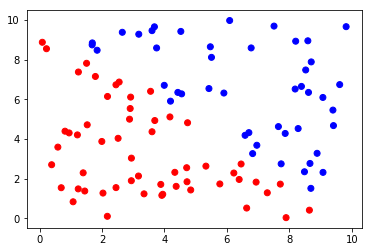

In [3]:
total_data = 200

X = np.random.uniform(0, 10, size = (100, 2))

y = [ int(((i + j) / 2) >= 5) for i, j in X ]

color = [ 'red' if i == 0 else 'blue' for i in y ]

plt.scatter(X[:, 0], X[:, 1], color = color)

plt.xticks()
plt.yticks()

plt.show()

In [46]:
training_size = 0.8

total = X.shape[0]

training_size = round(total * training_size)
validation_size = total - training_size

training_X = X[:training_size]
validation_X = X[training_size:]

training_y = y[:training_size]
validation_y = y[training_size:]

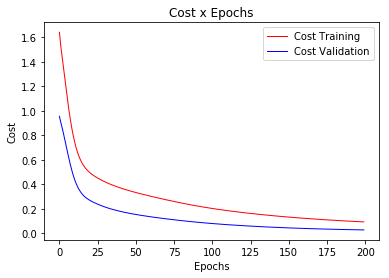

In [47]:
epochs = 200

classifier = linear_model.SGDClassifier(loss = "log",
                                        shuffle = False,
                                        fit_intercept = True,
                                        penalty = None,
                                        learning_rate = 'constant',
                                        eta0 = 0.1,
                                        max_iter = 1000,
                                        verbose = False)

classes = np.unique(training_y)

training_epochs = []
validation_epochs = []

for epoch in range(epochs):

    classifier.partial_fit(training_X, training_y, classes)
    
    training_prediction_y = classifier.predict_proba(training_X)
    
    #print(classifier.coef_)
    #print(classifier.intercept_)
    #print(training_prediction_y)
    
    training_mse = log_loss(training_y, training_prediction_y, normalize = True)
    
    training_epochs.append([epoch, training_mse])
    
    validation_prediction_y = classifier.predict_proba(validation_X)
    validation_mse = log_loss(validation_y, validation_prediction_y, normalize = True)
    
    validation_epochs.append([epoch, validation_mse])
    
training_df = pd.DataFrame(data = training_epochs, columns = ['Epoch', 'Cost'])
validation_df = pd.DataFrame(data = validation_epochs, columns = ['Epoch', 'Cost'])

plt.plot(training_df['Epoch'], training_df['Cost'], linewidth = 1.0, color = 'red')
plt.plot(validation_df['Epoch'], validation_df['Cost'], linewidth = 1.0, color = 'blue')

plt.xlabel('Epochs')
plt.ylabel('Cost')

plt.title("Cost x Epochs")
plt.legend(['Cost Training', 'Cost Validation'])

plt.show()

In [48]:
predicted_y = classifier.predict(validation_X)
accuracy_score(validation_y, predicted_y)

1.0

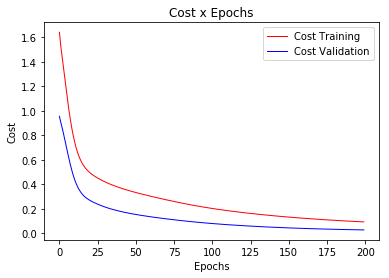

In [49]:
epochs = 200

classifier = SGDClassifier(eta0 = 0.1,
                           fit_intercept = True)

classes = np.unique(training_y)

training_epochs = []
validation_epochs = []

for epoch in range(epochs):
    
    classifier.partial_fit(training_X, training_y, classes)
    
    training_prediction_y = classifier.predict_proba(training_X)
    
    #print(classifier.coef_)
    #print(classifier.intercept_)
    #print(training_prediction_y)

    
    training_mse = log_loss(training_y, training_prediction_y, normalize = True)
    
    training_epochs.append([epoch, training_mse])
    
    validation_prediction_y = classifier.predict_proba(validation_X)
    validation_mse = log_loss(validation_y, validation_prediction_y, normalize = True)
    
    validation_epochs.append([epoch, validation_mse])
    
training_df = pd.DataFrame(data = training_epochs, columns = ['Epoch', 'Cost'])
validation_df = pd.DataFrame(data = validation_epochs, columns = ['Epoch', 'Cost'])

plt.plot(training_df['Epoch'], training_df['Cost'], linewidth = 1.0, color = 'red')
plt.plot(validation_df['Epoch'], validation_df['Cost'], linewidth = 1.0, color = 'blue')

plt.xlabel('Epochs')
plt.ylabel('Cost')

plt.title("Cost x Epochs")
plt.legend(['Cost Training', 'Cost Validation'])

plt.show()

In [50]:
predicted_y = classifier.predict(validation_X)
accuracy_score(validation_y, predicted_y)

1.0

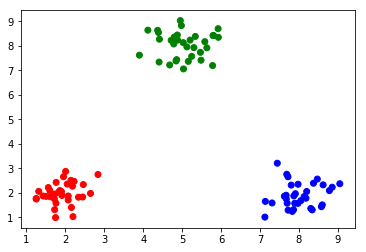

In [51]:
x1 = np.stack([np.random.normal(2, 0.5, 33), np.random.normal(2, 0.5, 33), [0] * 33], axis = 1)
x2 = np.stack([np.random.normal(5, 0.5, 33), np.random.normal(8, 0.5, 33), [1] * 33], axis = 1)
x3 = np.stack([np.random.normal(8, 0.5, 33), np.random.normal(2, 0.5, 33), [2] * 33], axis = 1)

data = np.concatenate((x1, x2, x3))

np.random.shuffle(data)

color = []

for x1, x2, y in data:
    
    if (y == 0):
        color.append('red')
    elif (y == 1):
        color.append('green')
    else:
        color.append('blue')

plt.scatter(data[:, 0], data[:, 1], color = color)

plt.xticks()
plt.yticks()

plt.show()

In [52]:
X = data[:, 0:2]
y = data[:, 2]

In [53]:
training_size = 0.8

total = X.shape[0]

training_size = round(total * training_size)
validation_size = total - training_size

training_X = X[:training_size]
validation_X = X[training_size:]

training_y = y[:training_size]
validation_y = y[training_size:]

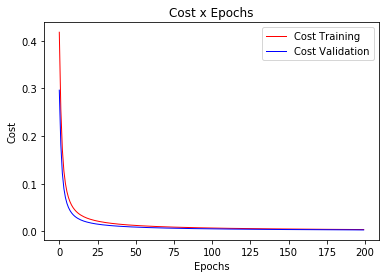

In [54]:
epochs = 200

classifier = linear_model.SGDClassifier(loss = "log",
                                        shuffle = False,
                                        fit_intercept = True,
                                        penalty = None,
                                        learning_rate = 'constant',
                                        eta0 = 0.1,
                                        max_iter = 1000,
                                        verbose = False)

classes = np.unique(training_y)

training_epochs = []
validation_epochs = []

for epoch in range(epochs):

    classifier.partial_fit(training_X, training_y, classes)
    
    training_prediction_y = classifier.predict_proba(training_X)
    training_mse = log_loss(training_y, training_prediction_y, normalize = True)
    
    training_epochs.append([epoch, training_mse])
    
    validation_prediction_y = classifier.predict_proba(validation_X)
    validation_mse = log_loss(validation_y, validation_prediction_y, normalize = True)
    
    validation_epochs.append([epoch, validation_mse])
    
training_df = pd.DataFrame(data = training_epochs, columns = ['Epoch', 'Cost'])
validation_df = pd.DataFrame(data = validation_epochs, columns = ['Epoch', 'Cost'])

plt.plot(training_df['Epoch'], training_df['Cost'], linewidth = 1.0, color = 'red')
plt.plot(validation_df['Epoch'], validation_df['Cost'], linewidth = 1.0, color = 'blue')

plt.xlabel('Epochs')
plt.ylabel('Cost')

plt.title("Cost x Epochs")
plt.legend(['Cost Training', 'Cost Validation'])

plt.show()

In [55]:
predicted_y = classifier.predict(validation_X)
accuracy_score(validation_y, predicted_y)

1.0

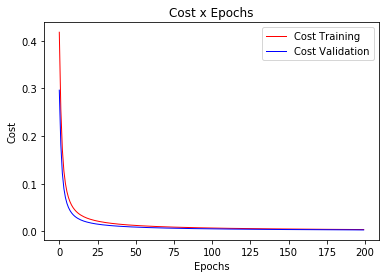

In [56]:
epochs = 200

classifier = SGDClassifier(fit_intercept = True,
                           eta0 = 0.1)

classes = np.unique(training_y)

training_epochs = []
validation_epochs = []

for epoch in range(epochs):

    classifier.partial_fit(training_X, training_y, classes)
    
    training_prediction_y = classifier.predict_proba(training_X)
    training_mse = log_loss(training_y, training_prediction_y, normalize = True)
    
    training_epochs.append([epoch, training_mse])
    
    validation_prediction_y = classifier.predict_proba(validation_X)
    validation_mse = log_loss(validation_y, validation_prediction_y, normalize = True)
    
    validation_epochs.append([epoch, validation_mse])
    
training_df = pd.DataFrame(data = training_epochs, columns = ['Epoch', 'Cost'])
validation_df = pd.DataFrame(data = validation_epochs, columns = ['Epoch', 'Cost'])

plt.plot(training_df['Epoch'], training_df['Cost'], linewidth = 1.0, color = 'red')
plt.plot(validation_df['Epoch'], validation_df['Cost'], linewidth = 1.0, color = 'blue')

plt.xlabel('Epochs')
plt.ylabel('Cost')

plt.title("Cost x Epochs")
plt.legend(['Cost Training', 'Cost Validation'])

plt.show()

In [57]:
predicted_y = classifier.predict(validation_X)
accuracy_score(validation_y, predicted_y)

1.0